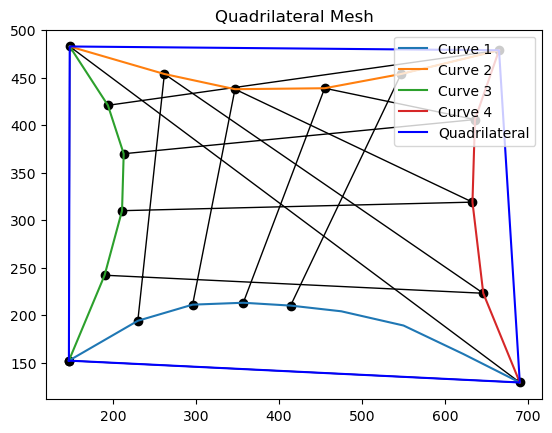

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# projetor bilinear
def projetor_bilinear(phi1, phi2, e1, e2, p1, p2, p3, p4, u, v):
    x1, y1 = phi1['x'], phi1['y']
    x2, y2 = phi2['x'], phi2['y']
    x3, y3 = e1['x'], e1['y']
    x4, y4 = e2['x'], e2['y']
    

    px = (1 - v) * (1 - u) * x1 + v * (1 - u) * x2 + (1 - v) * u * x4 + v * u * x3
    py = (1 - v) * (1 - u) * y1 + v * (1 - u) * y2 + (1 - v) * u * y4 + v * u * y3
    
    return px, py

def create_quadrilateral_mesh(phi1, phi2, e1, e2, num_u, num_v):
    mesh_points = []

    for i in range(num_u):
        for j in range(num_v):
            u = i / (num_u - 1)
            v = j / (num_v - 1)
            p1 = projetor_bilinear(phi1, phi2, e1, e2, curve1, curve2, curve3, curve4, u, v)

            mesh_points.append(p1)

    return np.array(mesh_points)

# leitura das curvas a partir do arquivo
def read_curve(file):
    n = int(file.readline())
    curve = [tuple(map(float, file.readline().split())) for _ in range(n)]
    return curve


with open('curvas1.txt', 'r') as file:
    curves = [read_curve(file) for _ in range(4)]

# curvas 
curve1 = pd.DataFrame(curves[0])
curve2 = pd.DataFrame(curves[1])
curve3 = pd.DataFrame(curves[2])
curve4 = pd.DataFrame(curves[3])

curve1.columns = ['x', 'y']
curve2.columns = ['x', 'y']
curve3.columns = ['x', 'y']
curve4.columns = ['x', 'y']

# usar as curvas para definir os phi1, phi2, e1, e2
phi1 = curve1
phi2 = curve2
e1 = curve3
e2 = curve4

# definir os pontos de controle com base nas curvas
p1 = (147.0, 152.0)
p2 = (690.0, 129.0)
p3 = (665.0, 479.0)
p4 = (148.0, 483.0)

# Number of points along the u and v directions
num_u = 2
num_v = 2

# Example usage
mesh_points = create_quadrilateral_mesh(curve1, curve2, curve3, curve4, num_u, num_v)

# Plotting the mesh with lines
plt.scatter(mesh_points[:, 0], mesh_points[:, 1], color='k')
plt.plot(mesh_points[:, 0], mesh_points[:, 1], color='k', linewidth=1)
plt.plot(curve1['x'], curve1['y'], label='Curve 1')
plt.plot(curve2['x'], curve2['y'], label='Curve 2')
plt.plot(curve3['x'], curve3['y'], label='Curve 3')
plt.plot(curve4['x'], curve4['y'], label='Curve 4')
plt.plot([p1[0], p2[0], p3[0], p4[0], p1[0]], [p1[1], p2[1], p3[1], p4[1], p1[1]], label='Quadrilateral', color='blue')
plt.legend(loc = 'upper right', shadow=False)
plt.title('Quadrilateral Mesh')
plt.savefig('quadrilateral_mesh_1.pdf')
plt.show()

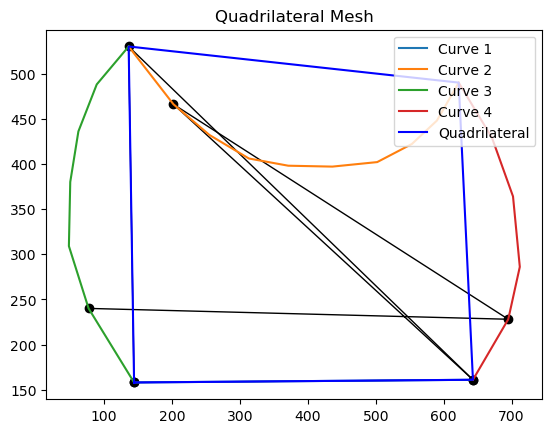

In [116]:
with open('curvas2.txt', 'r') as file:
    curves = [read_curve(file) for _ in range(4)]

# curvas 
curve1 = pd.DataFrame(curves[0])
curve2 = pd.DataFrame(curves[1])
curve3 = pd.DataFrame(curves[2])
curve4 = pd.DataFrame(curves[3])

curve1.columns = ['x', 'y']
curve2.columns = ['x', 'y']
curve3.columns = ['x', 'y']
curve4.columns = ['x', 'y']

# usar as curvas para definir os phi1, phi2, e1, e2
phi1 = curve1
phi2 = curve2
e1 = curve3
e2 = curve4

# definir os pontos de controle com base nas curvas
p1 = (144.0, 158.0)
p2 = (643.0, 161.0)
p3 = (622.0, 490.0)
p4 = (136.0, 530.0)

# Number of points along the u and v directions
num_u = 2
num_v = 2

# Example usage
mesh_points = create_quadrilateral_mesh(curve1, curve2, curve3, curve4, num_u, num_v)

# Plotting the mesh with lines
plt.scatter(mesh_points[:, 0], mesh_points[:, 1], color='k')
plt.plot(mesh_points[:, 0], mesh_points[:, 1], color='k', linewidth=1)
plt.plot(curve1['x'], curve1['y'], label='Curve 1')
plt.plot(curve2['x'], curve2['y'], label='Curve 2')
plt.plot(curve3['x'], curve3['y'], label='Curve 3')
plt.plot(curve4['x'], curve4['y'], label='Curve 4')
plt.plot([p1[0], p2[0], p3[0], p4[0], p1[0]], [p1[1], p2[1], p3[1], p4[1], p1[1]], label='Quadrilateral', color='blue')
plt.legend(loc = 'upper right', shadow=False)
plt.title('Quadrilateral Mesh')
plt.savefig('quadrilateral_mesh_2.pdf')
plt.show()

In [133]:
from scipy.interpolate import griddata
from scipy.interpolate import interp2d

# definir os pontos de controle com base nas curvas
p1 = (147.0, 152.0)
p2 = (690.0, 129.0)
p3 = (665.0, 479.0)
p4 = (148.0, 483.0)

# Number of points along the u and v directions
num_u = 2
num_v = 2

# use interpe2d
x = [p1[0], p2[0], p3[0], p4[0]]
y = [p1[1], p2[1], p3[1], p4[1]]
z = [0, 0, 0, 0]

f = interp2d(x, y, z, kind='linear')



/tmp/ipykernel_23489/2812735764.py:19: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interp2d(x, y, z, kind='linear')


In [132]:
curves[0]

[(147.0, 152.0),
 (230.0, 194.0),
 (296.0, 211.0),
 (357.0, 213.0),
 (414.0, 210.0),
 (475.0, 204.0),
 (550.0, 189.0),
 (622.0, 159.0),
 (690.0, 129.0)]